# InstaBot - Part 2

In [28]:
# importing all the libraries 
import time
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import matplotlib.pyplot as plt
from collections import OrderedDict
from datetime import datetime, timedelta
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import ElementClickInterceptedException
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support import expected_conditions as EC


In [17]:
# initializing the webdriver browser 
# you can set the executable path of your chrome_driver underneath
driver = webdriver.Chrome()
driver.maximize_window()

The version of chrome cannot be detected. Trying with latest driver version


In [18]:
# initializing a get request to the browser for Instagram.com
driver.get('https://www.instagram.com/')

In [19]:
# update your username and password for log in 
username = 'shirpure1998'
password = 'Shirpure1998@'

In [20]:
# initializing object for WebDriverWait
wait = WebDriverWait(driver, 10)

In [21]:
#this function lets you login in your Instagram handle
def LogIn(username, password):
    try :
        #locating the username textbox and sending username
        user_name = wait.until(EC.presence_of_element_located((By.NAME,"username")))
        #making sure that user name input box is clear
        user_name.clear()
        time.sleep(1)
        user_name.send_keys(username)
        #locating the password textbox and sending password
        pwd = driver.find_element(By.NAME,"password")
        #making sure that password input box is clear
        pwd.clear()
        time.sleep(1)
        pwd.send_keys(password)
        #locating login button
        button = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"button[type = 'submit']")))
        button.submit()
        #Save Your Login Info? : Not Now
        pop1 = wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(text(),"Not Now")]')))
        pop1.click()
        #notification Turn on or Not
        pop2 = wait.until(EC.presence_of_element_located((By.XPATH,"//button[contains(@class,'_a9--')]")))
        pop2.click()
        
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [22]:
#call the function to Log in to your Instagram Handle
#change the login credentials above if you want to login in some different instagram handle
LogIn(username,password)

In [112]:
#this function lets you search a profile and open it
def search_opening_profiles(value):
    driver.refresh()
    time.sleep(1)
    try :
        #notification Turn on or Not
        pop2 = driver.find_element(By.XPATH,"//button[contains(@class,'_a9--')]")
        pop2.click()
    except ElementClickInterceptedException:
        pass        
    except TimeoutException:
        pass
    except NoSuchElementException:
        pass
    try:
        #locating the search box and cliking on it
        search_box = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,'svg[aria-label="Search"]')))
        search_box.click() 
        time.sleep(1)
        #sending the value in the search box
        sending_value = driver.find_element(By.CSS_SELECTOR,'input[aria-label = "Search input"]')
        sending_value.clear()
        sending_value.send_keys(value)
        time.sleep(1)
        #waiting till the searched is done
        wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"div[role='none']")))
        time.sleep(1)
        #retry mechanism for StaleElementReferenceException
        for i in range(3):
            try:
                #finding the searched account and clicking on it.
                account = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"div[role='none']")))
                account.click()
                break
            except StaleElementReferenceException: 
                continue
        #after done searching it will remove the search bar and gives you the full page of that Instagram handler.
        try:
            wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'_aawn')]")))
            wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"_aa_y")]'))).click() 
            time.sleep(2)
        except NoSuchElementException:
            pass
    except ElementClickInterceptedException:
        close = driver.find_element(By.CSS_SELECTOR,"svg[aria-label='Close']")
        close.click()
        print("Try Again")  
        print("Something Went Wrong!")     
    except TimeoutException:
        print("No Search Found!")

### Problem 1 : Analyse the habits of bloggers
Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.    
1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers  
2.Now Find the number of posts these handles have done in the previous 3 days.  
3.Depict this information using a suitable graph.  

In [108]:
#First 10 handles from part-1
first_10_handles = ['foodtalkindia','dilsefoodie','foodie_incarnate','foodgod','germany.explores','foodliti','foodyeating','yourfoodlab','foodnetworkkitchen','foodporn']
first_10_handles

['foodtalkindia',
 'dilsefoodie',
 'foodie_incarnate',
 'foodgod',
 'germany.explores',
 'foodliti',
 'foodyeating',
 'yourfoodlab',
 'foodnetworkkitchen',
 'foodporn']

In [126]:
def top_5_handles(first_10_handles):
    try:
        #locating the search box and cliking on it
        search_box = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,'svg[aria-label="Search"]')))
        search_box.click() 
        top_5 = {}
        for i in first_10_handles: 
            search_opening_profiles(i)
            # waiting till all search is done.
            time.sleep(2)
            #locating and getting the number of followers.
            followers = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"_ac2a")))[1]
            top_5[i] = int(followers.get_attribute("title").replace(",",""))
            count = 0
            new_result = {}
            for i in sorted(top_5 , key=top_5.get, reverse=True):
                new_result[i] = top_5[i]
                count = count + 1
                if count == 5:
                    break            
        return new_result
    except TimeoutException:
        print("Something went wrong!, Try Again")

In [127]:
result = top_5_handles(first_10_handles)
print('Top 5 instagram handles which have the highest number of followers')
for key,value in result.items():
    print(key,":",value)

Top 5 instagram handles which have the highest number of followers
foodgod : 3895599
foodyeating : 2868429
yourfoodlab : 2711734
foodie_incarnate : 1622019
foodporn : 1391318


##### 2.Now Find the number of posts these handles have done in the previous 3 days.

In [170]:
def number_of_post(day):
    try:
        post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,"_aagw")))
        post.click()
        time.sleep(1)
        count = 0
        while True:
            temp = wait.until(EC.presence_of_element_located((By.XPATH,"//time[contains(@class,'_a9ze')]")))
            time.sleep(1)
            date_string = temp.get_attribute("datetime")
            format_code = "%Y-%m-%dT%H:%M:%S"
            date = datetime.strptime(date_string[:19],format_code)
            if (datetime.now() - date).days > day:
                break
            else:
                count = count + 1
            next_post = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"svg[aria-label='Next']")))
            next_post.click()
            time.sleep(2)
        close = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"svg[aria-label='Close']")))
        close.click()
        return count
    except ElementClickInterceptedException:
        driver.refresh()
        print("Try Again Please!")
    except TimeoutException:
        print("Something Went Wrong!, Try Again")

In [174]:
total_post_count = {}
for i in result:
    search_opening_profiles(i)
    time.sleep(3)
    count = number_of_post(3)
    total_post_count[i] = count
print('Number of posts these handles have done in the previous 3 days : -')
for i in total_post_count:
    print(i,":",total_post_count[i])

Number of posts these handles have done in the previous 3 days : -
foodgod : 0
foodyeating : 13
yourfoodlab : 1
foodie_incarnate : 2
foodporn : 0


##### 3.Depict this information using a suitable graph.

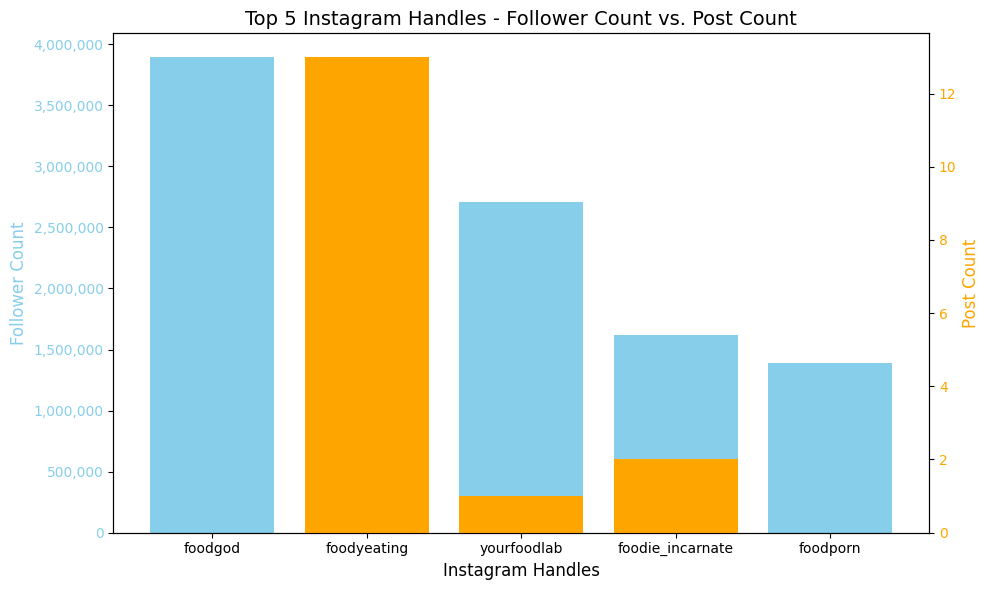

In [195]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Sample data (replace with your actual data)
instagram_handles = result.keys()
follower_counts = result.values()
post_counts = total_post_count.values()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot follower counts as a bar graph on the left y-axis
ax1.bar(range(1, len(instagram_handles) + 1), follower_counts, color='skyblue')
ax1.set_ylabel('Follower Count', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis on the right for post counts
ax2 = ax1.twinx()

# Plot post counts as a bar graph on the right y-axis
# Plot post counts as a bar graph on the right y-axis without transparency
ax2.bar(range(1, len(instagram_handles) + 1), post_counts, color='orange')
ax2.set_ylabel('Post Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Set the title and labels
plt.title('Top 5 Instagram Handles - Follower Count vs. Post Count')
plt.xlabel('Instagram Handles')

# Format the x-axis ticks to start from 1 and increment by 1
plt.xticks(range(1, len(instagram_handles) + 1), instagram_handles, rotation=45, ha='right')

# Format the y-axis labels to show accurate follower counts
def format_follower_count(x, pos):
    return f'{int(x):,}'  # Format the number with commas as thousands separators

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(format_follower_count))

# Set font size for x and y axis labels and the title
ax1.set_xlabel('Instagram Handles', fontsize=12)
ax1.set_ylabel('Follower Count', color='skyblue', fontsize=12)
ax2.set_ylabel('Post Count', color='orange', fontsize=12)
plt.title('Top 5 Instagram Handles - Follower Count vs. Post Count', fontsize=14)

# Add some padding to the plot
plt.tight_layout()

# Show the plot
plt.show()

